In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from PIL import Image


In [ ]:
def diffraction_pattern():
  col = imread("triangle.png")
  bw = rgb2gray(col)

  # Pixel range is 0...255, 256/2 = 128
  bw[bw < 1] = 0    # Black
  bw[bw == 1] = 1 # White

  img_gray = bw
  imshow(img_gray)
  dp = np.abs(np.fft.rfft2(img_gray))**2
  return dp

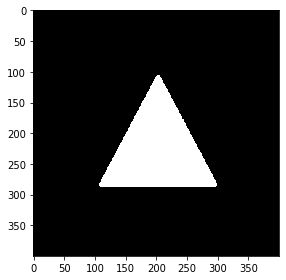

In [ ]:
a = diffraction_pattern()

In [ ]:
def iterative_loop(dp, N, iterations):
  # creating initial complex-valued field distribution at the detector plane
  img_amplitudes = np.sqrt(dp)
  phase = (2*np.random.rand(N,(N//2)+1) - 1) * np.pi
  field_detector_start = img_amplitudes * np.exp(1j * phase)

  # getting initial object distribution
  object_start = np.fft.irfft2(field_detector_start)
  gk = object_start

  # creating support
  support = np.zeros((N, N))
  R = N / 3
  for i in range(N):
    for j in range(N):
      x = N / 2 - i;
      y = N / 2 - j;
      if ((abs(x) < R) and (abs(y) < R)):
        support[i,j] = 1;
  
  # iterative loop
  treshold = 1
  for i in range(iterations):
    field_detector = np.fft.rfft2(gk)
    field_detector_updated = img_amplitudes * np.exp(1j * np.angle(field_detector))
    gk_updated = np.fft.irfft2(field_detector_updated)
    gk1 = np.zeros((N, N))

    #object constraint
    for i in range(N):
      for j in range(N):
        if gk_updated[i,j] >= 0 and support[i,j] > 0.5:
          gk1[i,j] = gk_updated[i,j]
        else:
          gk1[i,j] = 0; # for white triangle use gk1[i,j] == 0, for black - 1

    #treshold constraint      
    for i in range(N):
      for j in range(N):
        if ((gk1[i,j] > treshold)):
          gk1[i,j] = treshold;

    gk = gk1;

  # getting final image
  imshow(gk)

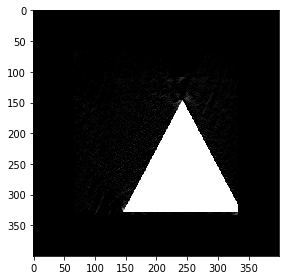

In [ ]:
iterative_loop(diffraction_pattern(), 400, 200)